In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import minimize
import geatpy as ea

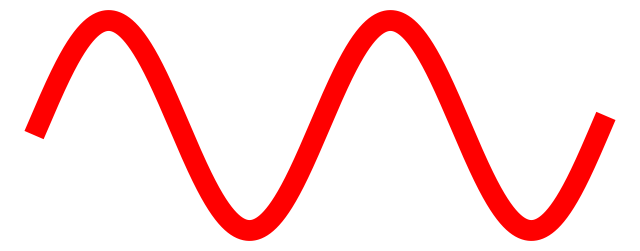

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 可调参数
# =========================
frequency = 2.0     # 频率（Hz，或者你想理解成“每单位长度振几次”）
length = 1       # 波形长度（x 轴范围）
amplitude = 1.0     # 振幅
linewidth = 15      # 线条粗细

# =========================
# 生成正弦波
# =========================
x = np.linspace(0, length, 2000)
y = amplitude * np.sin(2 * np.pi * frequency * x)

# =========================
# 画图
# =========================
plt.figure(figsize=(8, 3))
plt.plot(x, y, c='r', linewidth=linewidth)

plt.axis('off')          # 去掉坐标轴（更像示意图）
plt.savefig('figure/sine_wave_ori.pdf', bbox_inches='tight')


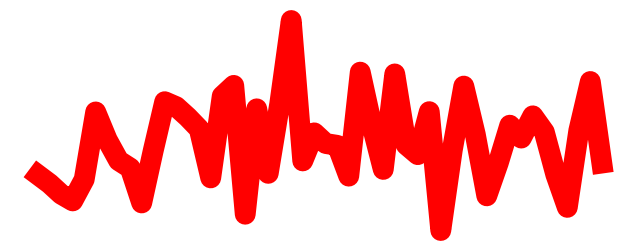

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 可调参数
# =========================
length = 1.0          # x 轴长度
n_points = 50
noise_scale = 1.0     # 噪声强度
linewidth = 15

# =========================
# 生成白噪声
# =========================
x = np.linspace(0, length, n_points)
y = noise_scale * np.random.randn(n_points)

# =========================
# 画图
# =========================
plt.figure(figsize=(8, 3))
plt.plot(x, y, color='r', linewidth=linewidth)

plt.axis('off')          # 去掉坐标轴（更像示意图）
plt.savefig('figure/sine_wave_noise.pdf', bbox_inches='tight')


In [21]:
np.random.seed(0)

T = 600  # ms
n_exc = 200
n_inh = 200
rate_exc = 20 / 1000  # Hz -> ms^-1
rate_inh = 20 / 1000

spike_times_exc = [
    np.where(np.random.rand(T) < rate_exc)[0]
    for _ in range(n_exc)
]

spike_times_inh = [
    np.where(np.random.rand(T) < rate_inh)[0]
    for _ in range(n_inh)
]


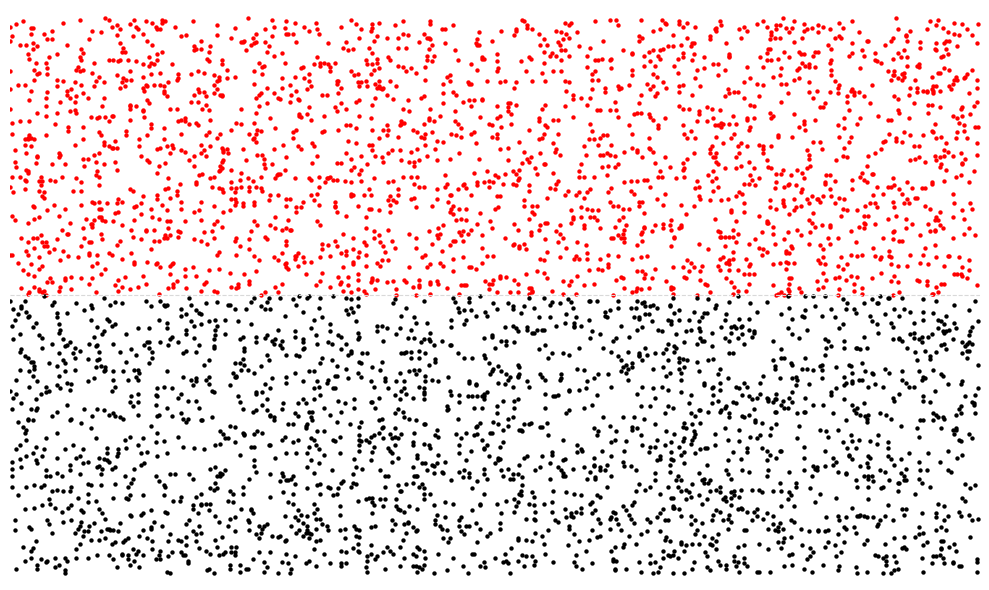

In [23]:
# =========================
# NC-style raster plot
# =========================

fig, ax = plt.subplots(figsize=(10, 6))  # panel b 常见尺寸

# Inhibitory raster (gray/black)
offset = len(spike_times_exc)
for i, spikes in enumerate(spike_times_inh):
    ax.scatter(
        spikes,
        np.full_like(spikes, i + offset),
        s=10,
        color='red',   # inhibitory = gray
        alpha=1,
        linewidths=0
    )

# Excitatory raster (red)
for i, spikes in enumerate(spike_times_exc):
    ax.scatter(
        spikes,
        np.full_like(spikes, i),
        s=10,
        color='black',   # excitatory = red
        alpha=1,
        linewidths=0
    )

# =========================
# Axis & style (NC-like)
# =========================
ax.axhline(
    y=offset,
    color='0.85',
    linestyle='--',
    linewidth=0.8
)

# =========================
# NC-style cleanup
# =========================
ax.set_xlim(0, 600)  # 仍然设置范围，但不显示
ax.set_ylim(-5, offset + len(spike_times_inh) + 5)

# ❌ 去掉所有坐标和边框
ax.axis('off')

plt.tight_layout()
plt.savefig('NC_figures/NC_style_raster_plot.pdf')


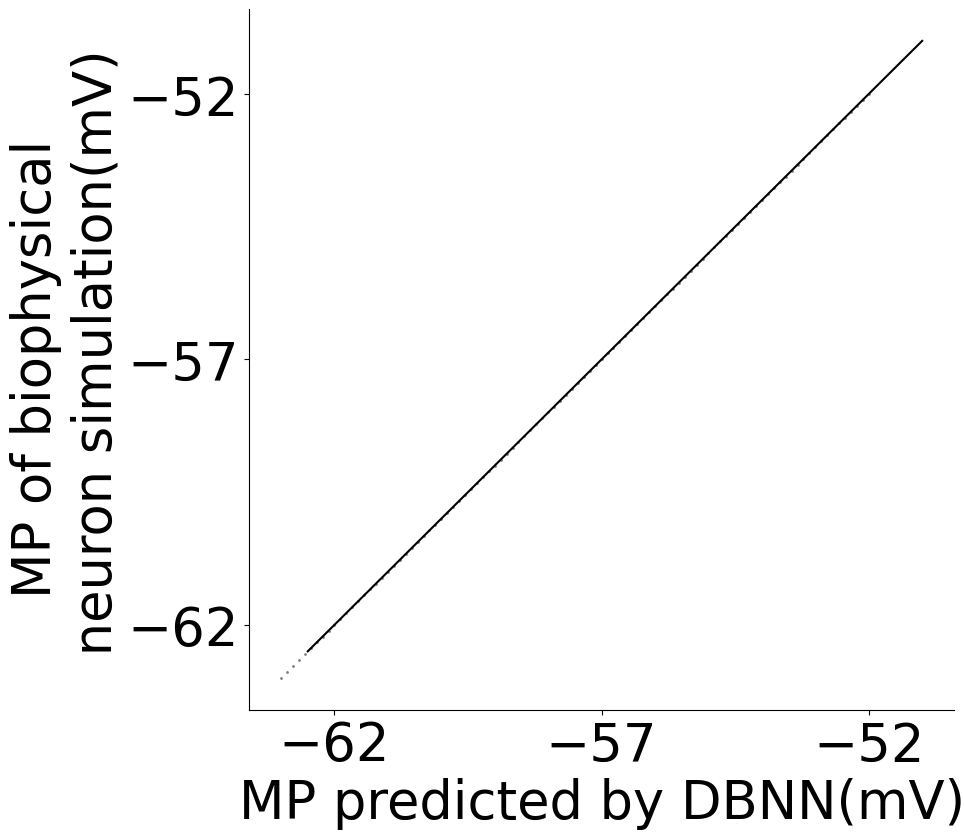

In [5]:
plt.rcParams.update({'font.size': 50})
a = np.linspace(-63, -52, 100)
b = a
x = np.linspace(-62.5, -51, 100)
plt.figure(figsize=(9.1, 9.1))
plt.scatter(a, b , color='grey', s=1)
plt.plot(x, x, color='black')
plt.xlabel('MP predicted by DBNN(mV)')
plt.ylabel('MP of biophysical \n neuron simulation(mV)')

# Set the x and y axis ticks
plt.xticks([-62, -57, -52])
plt.yticks([-62, -57, -52])

# Get the current axes
ax = plt.gca()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/MP_scatter_plot_3.png', bbox_inches='tight', dpi=800)

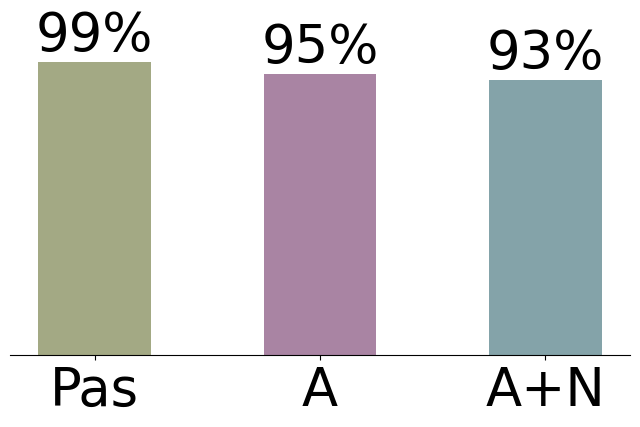

In [35]:
plt.rcParams.update({'font.size': 38})
x=[1, 2, 3]
#数据集
y=[98.8, 94.7, 92.6]
#误差列表
y_err=[[0.2,0.9,1.4],[0.1, 0.8, 1.7]]
# plt.figure(figsize=(8,4))
fig, ax = plt.subplots(figsize=(8,4))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
error_params=dict(elinewidth=3,ecolor='coral',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
ax.bar(x,y,color=['#a3a984','#a984a3','#84A3A9'], tick_label=['Pas','A','A+N'], width=0.5)
# ax.set_ylabel('VE')
# plt.xticks([])
ax.set_yticks([])
# plt.axis('off')
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b + '%', ha='center', va= 'bottom',fontsize=38)
plt.savefig('figure/ve_bar_plot.png', bbox_inches='tight', dpi=800)

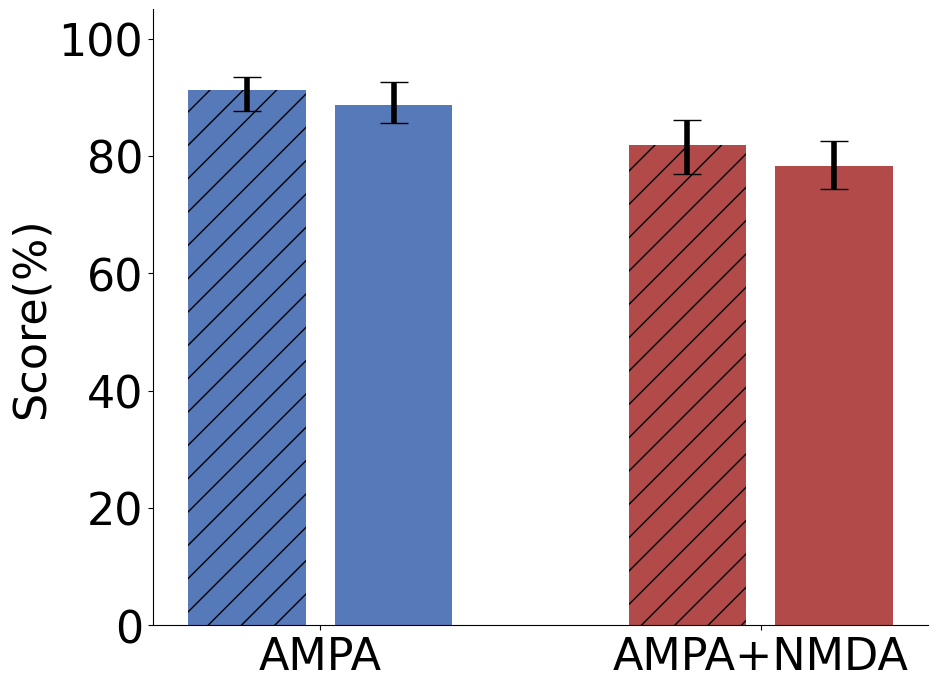

In [17]:
plt.rcParams.update({'font.size': 32})
x1 = [1, 2]
y1 = [91.2, 88.7]
y1err = [[3.5, 3], [2.2, 3.9]]

x2 = [4, 5]
y2 = [81.9, 78.3]
y2err = [[5, 4], [4.3, 4.2]]

plt.figure(figsize=(10,8))
plt.ylim(0, 105)
error_params=dict(elinewidth=4,ecolor='black',capsize=10)#设置误差标记参数
plt.bar(x1,y1,color=['#5679BA','#5679BA'],yerr=y1err, error_kw=error_params, width=0.8, hatch=['/', ''])
plt.bar(x2,y2,color=['#B24A4A','#B24A4A'],yerr=y2err, error_kw=error_params, width=0.8, hatch=['/', ''])
plt.ylabel('Score(%)')
plt.xticks([1.5, 4.5], ['AMPA', 'AMPA+NMDA'], rotation=0)

# Get the current axes
ax = plt.gca()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/pre_rec_bar_plot_new.pdf', bbox_inches='tight')

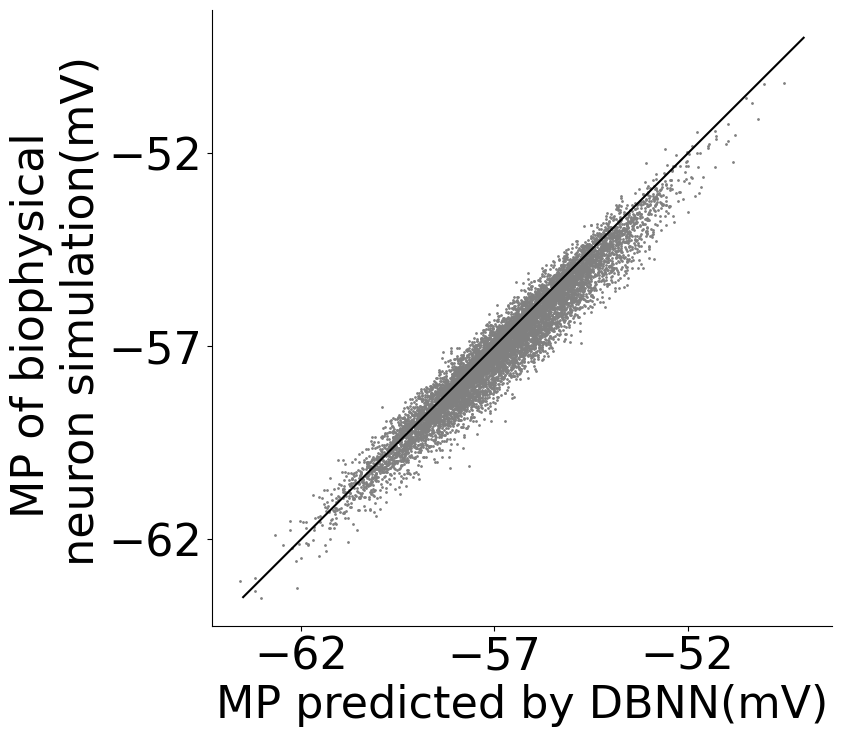

In [12]:
plt.rcParams.update({'font.size': 32})
a = np.linspace(-63, -52, 100)
b = a
x = np.linspace(-63.5, -49, 100)
plt.figure(figsize=(8, 8))

plt.xlabel('MP predicted by DBNN(mV)')
plt.ylabel('MP of biophysical \n neuron simulation(mV)')
kappa = np.random.randn(10000) * 1.7 + -57
np.random.shuffle(kappa)
a = np.zeros_like(kappa)
a[:int(len(kappa)*0.11)] = kappa[:int(len(kappa)*0.11)] + kappa[:int(len(kappa)*0.11)] * np.random.randn(int(len(kappa)*0.11)) * 0.001 + 0.3
a[int(len(kappa)*0.11):int(len(kappa)*0.22)] = kappa[int(len(kappa)*0.11):int(len(kappa)*0.22)] + kappa[int(len(kappa)*0.11):int(len(kappa)*0.22)] * np.random.randn(int(len(kappa)*0.11)) * 0.003 
a[int(len(kappa)*0.22):int(len(kappa)*0.55)] = kappa[int(len(kappa)*0.22):int(len(kappa)*0.55)] + kappa[int(len(kappa)*0.22):int(len(kappa)*0.55)] * np.random.randn(int(len(kappa)*0.33)) * 0.006
a[int(len(kappa)*0.55):] = kappa[int(len(kappa)*0.55):] + kappa[int(len(kappa)*0.55):] * np.random.randn(int(len(kappa)*0.45)) * 0.008 + 0.5
# Set the x and y axis ticks
plt.xticks([-62, -57, -52])
plt.yticks([-62, -57, -52])
plt.scatter(a, kappa, color='grey', s=1)
plt.plot(x, x, color='black')
# Get the current axes
ax = plt.gca()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/MP_scatter_plot_L5PC.pdf', bbox_inches='tight')

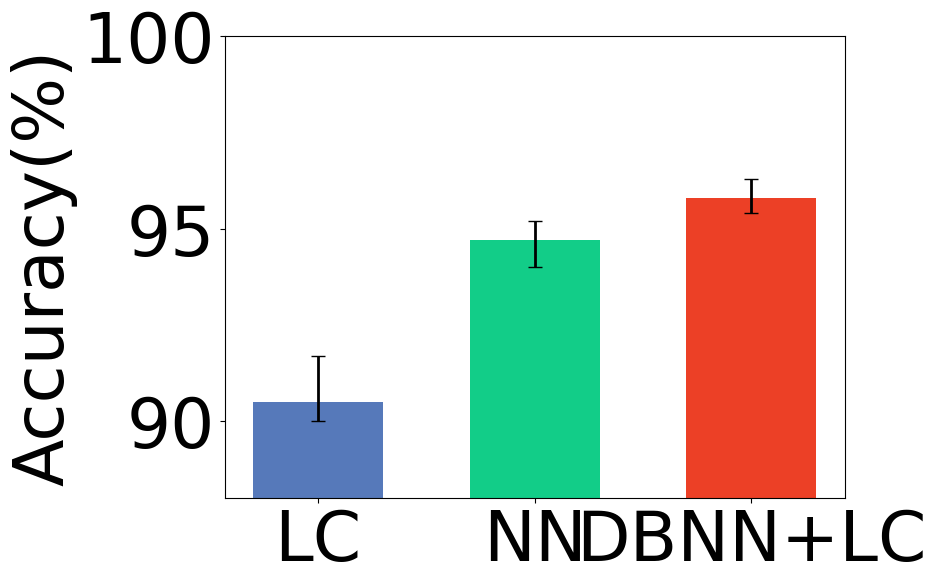

In [2]:
plt.rcParams.update({'font.size': 50})
x=[1, 2, 3]
#数据集
y=[90.5, 94.7, 95.8]
#误差列表
y_err=[[0.5,0.7,0.4],[1.2, 0.5,0.5]]
plt.figure(figsize=(8,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#5679BA','#12cd88', '#EC4026'],yerr=y_err, error_kw=error_params,\
                    tick_label=['LC','NN', 'DBNN+LC'])
plt.ylim(88, 100)
plt.yticks([90, 95, 100])


plt.ylabel('Accuracy(%)')
plt.savefig('figure/10_MNIST_2.png', bbox_inches='tight', dpi=800)
plt.show()

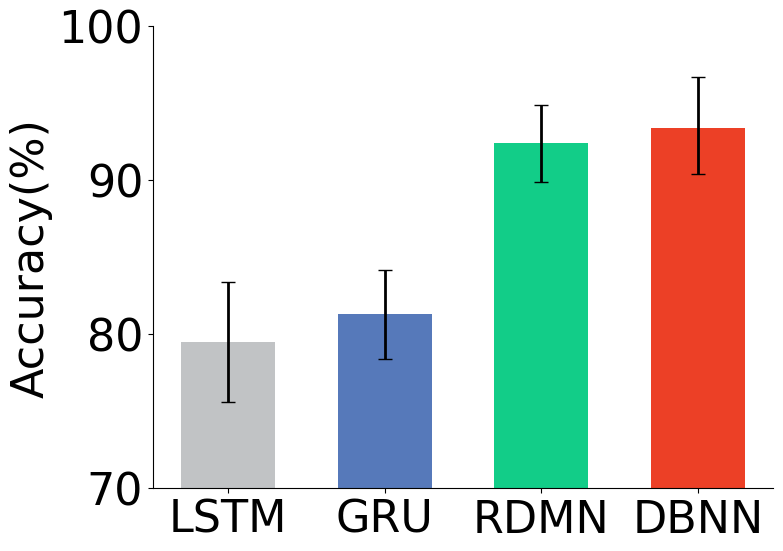

In [43]:
x=[1, 2, 3, 4]
#数据集
y=[79.5, 81.3, 92.4, 93.4]
#误差列表
y_err=[[3.9,2.9,2.5,3],[3.9, 2.9,2.5,3.3]]
plt.figure(figsize=(8,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#c1c3c5', '#5679BA','#12cd88', '#EC4026'], yerr=y_err, error_kw=error_params,\
                    tick_label=['LSTM','GRU', 'RDMN', 'DBNN'])
plt.ylim(70, 100)
# plt.yticks([70, 79, 88, 97])
# Get the current axes
ax = plt.gca()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('Accuracy(%)')
plt.savefig('figure/gait_recogntion_new.png', bbox_inches='tight', dpi=800)
plt.show()

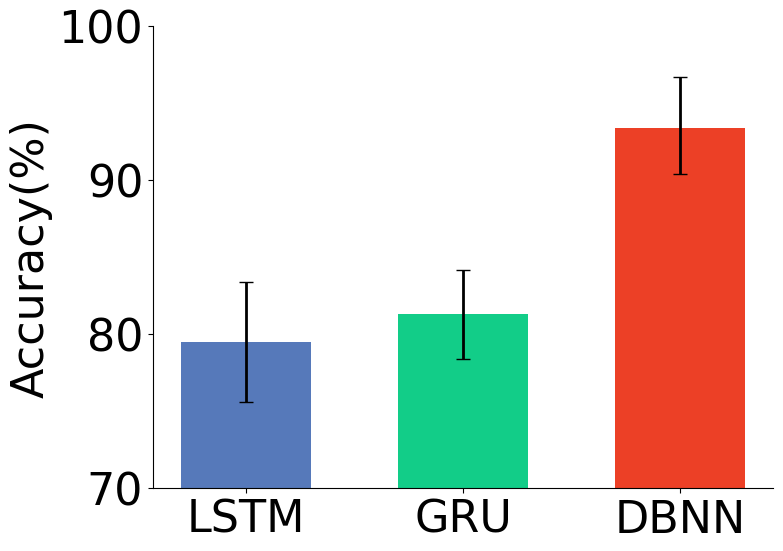

In [ ]:
plt.rcParams.update({'font.size': 32})
x=[1, 2, 3]
#数据集
y=[79.5, 81.3, 93.4]
#误差列表
y_err=[[3.9,2.9,3],[3.9, 2.9,3.3]]
plt.figure(figsize=(8,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#5679BA','#12cd88', '#EC4026'], yerr=y_err, error_kw=error_params,\
                    tick_label=['LSTM','GRU', 'DBNN'])
plt.ylim(70, 100)
# plt.yticks([70, 79, 88, 97])
# Get the current axes
ax = plt.gca()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('Accuracy(%)')
plt.savefig('figure/gait_recogntion_new_2.png', bbox_inches='tight', dpi=800)
plt.show()

In [2]:
with open('/home/mjy/project/bilinear_network/data_old/Vsep_1000.p', 'rb') as fo:
    EPSP = pickle.load(fo, encoding='bytes')

In [39]:
def biexponential(w, x, tau_rise, tau_decay):
    return w * (1 - np.exp(-x / tau_rise)) * np.exp(-x / tau_decay)

In [42]:
x = np.linspace(0, 200, 200)
y = biexponential(3.1, x, 6, 55)

In [45]:
Vars = np.array([3.1, 6, 55])
y = biexponential(Vars[0], x, Vars[1], Vars[2])
def evalVars(Vars):
    y = biexponential(Vars[0], x, Vars[1], Vars[2]) - 62.5
    f = np.mean(np.square(y - ((EPSP[8][:200]+62.5)*4-62.5)))
    return f

In [46]:
evalVars(Vars)

0.004216043026256562

In [48]:
res = minimize(evalVars, x0=Vars, method='BFGS', options={'disp': True, 'maxiter' : 2000})

Optimization terminated successfully.
         Current function value: 0.003181
         Iterations: 28
         Function evaluations: 124
         Gradient evaluations: 31


In [49]:
res.x

array([ 2.90264204,  5.27679386, 59.81718597])

In [79]:
Vars = res.x
y = biexponential(2.9, x, 5, 48)
b = biexponential(3.1, x, 6, 45)

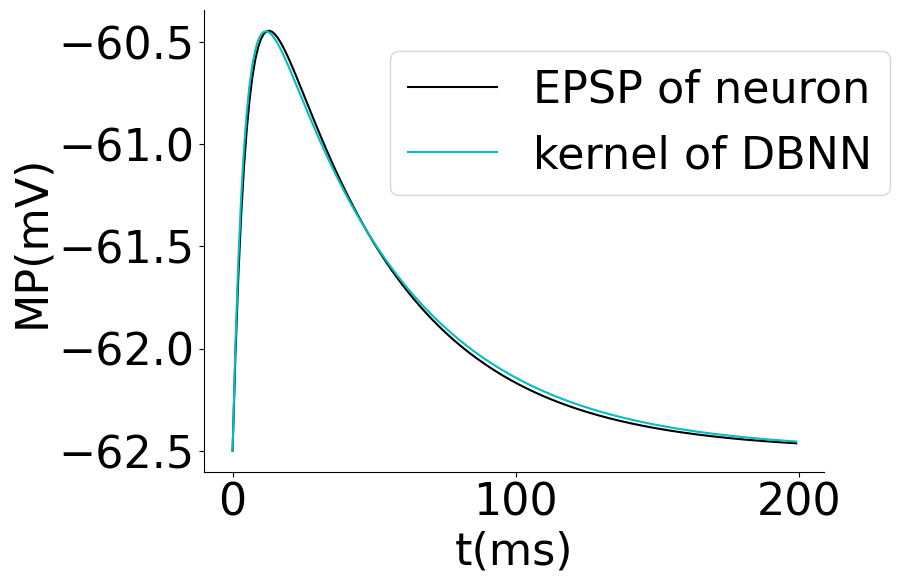

In [95]:
plt.rcParams.update({'font.size': 32})
plt.figure(figsize=(8, 6))
plt.plot(b-62.5, c='black', label='EPSP of neuron')
plt.plot(y-62.5, c='c', label='kernel of DBNN')
plt.xlabel('t(ms)')
plt.ylabel('MP(mV)')
plt.legend(loc=(0.3, 0.6))
# Get the current axes
ax = plt.gca()
# plt.yticks([-62.5, -61.5, -60.5])
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/EPSP_compare.png', bbox_inches='tight', dpi=800)

In [104]:
y = -biexponential(1.12, x, 4, 47)
b = -biexponential(1.2, x, 5, 45)

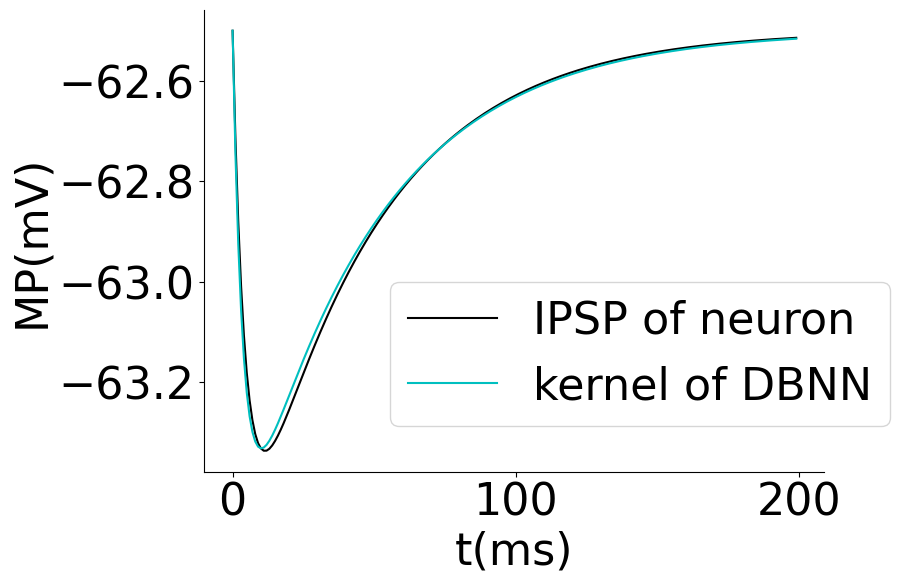

In [106]:
plt.rcParams.update({'font.size': 32})
plt.figure(figsize=(8, 6))
plt.plot(b-62.5, c='black', label='IPSP of neuron')
plt.plot(y-62.5, c='c', label='kernel of DBNN')
plt.xlabel('t(ms)')
plt.ylabel('MP(mV)')
plt.legend(loc=(0.3, 0.1))
# Get the current axes
ax = plt.gca()
# plt.yticks([-62.5, -61.5, -60.5])
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/IPSP_compare.png', bbox_inches='tight', dpi=800)

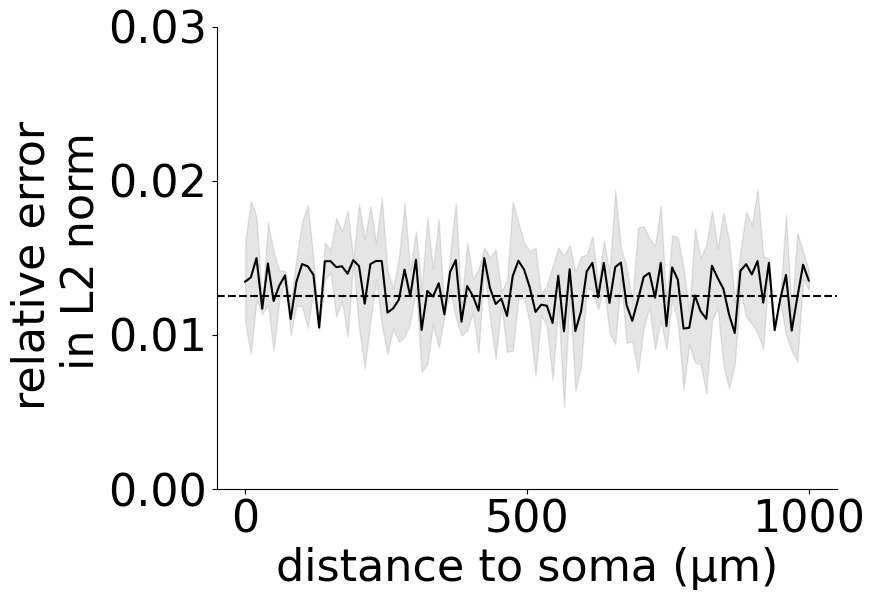

In [111]:
# 生成一些示例数据
plt.rcParams.update({'font.size': 32})
plt.figure(figsize=(8, 6))
x = np.linspace(0, 1000, 100)
y = np.random.rand(100)*0.005 + 0.01
# errors_upper = np.random.rand(100)*0.015
# errors_lower = np.random.rand(100)*0.003  # 随机生成误差值
errors = np.random.rand(100)*0.005

# 创建折线图并添加误差线
plt.plot(x, y, color='black', label='mean')
plt.fill_between(x, y - errors, y + errors, color='grey', alpha=0.2)
plt.axhline(0.0125, c='black', ls='--')
plt.xlabel('distance to soma (μm)')
plt.ylabel('relative error \n in L2 norm')
plt.ylim(0, 0.03)
# Get the current axes
ax = plt.gca()
# plt.yticks([-62.5, -61.5, -60.5])
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/L2_error_with_distance.png', bbox_inches='tight', dpi=800)
# plt.title('Line Plot with Error Bars')
# plt.legend()
# plt.grid()

plt.show()

In [112]:
a = [1.1, 2.05, 2.95, 4.11, 5.04, 6.08, 7.1, 7.91, 9.03, 10.14, 11.01, 12]
b= [0.254, 0.48, 0.73, 1.05, 1.28, 1.5, 1.73 ,2.06, 2.28, 2.54, 2.79, 3.05]

<Figure size 600x600 with 0 Axes>

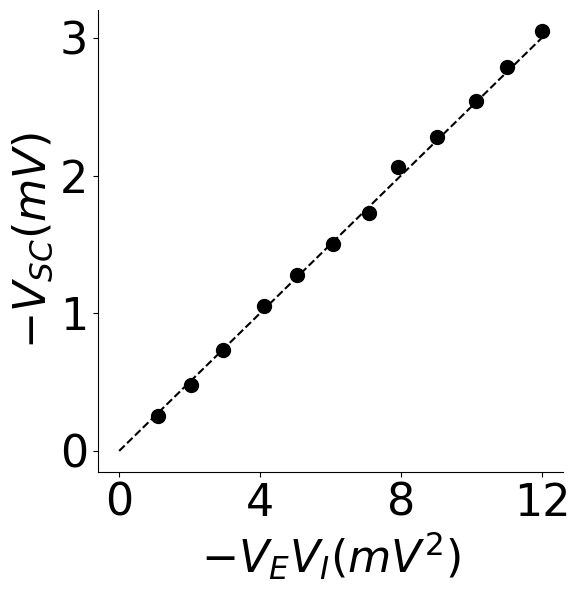

In [116]:
# 生成一些示例数据
plt.rcParams.update({'font.size': 32})
plt.figure(figsize=(6, 6))

x = np.linspace(0, 12, 100)
y = 0.25 * x
plt.figure(figsize=(6,6))
plt.scatter(a, b, c='black', s=100)
plt.plot(x, y, c='black', ls='--')
plt.xlabel(r'$-V_{E}V_I(mV^2)$')
plt.ylabel(r'$-V_{SC}(mV)$')
# Get the current axes
ax = plt.gca()
# plt.yticks([-62.5, -61.5, -60.5])
plt.xticks([0, 4, 8, 12])
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/kappa_check_ei_new.png', bbox_inches='tight', dpi=800)
plt.show()

In [119]:
kappa = np.empty(500000)
kappa[:125000] = np.random.randn(125000) * 0.01 - 0.01
kappa[125000:] = np.random.randn(375000) * 0.05 + 0.2
np.random.shuffle(kappa)
a = np.zeros_like(kappa)
a[:int(len(kappa)*0.11)] = kappa[:int(len(kappa)*0.11)] + kappa[:int(len(kappa)*0.11)] * np.random.randn(int(len(kappa)*0.11)) * 0.10
a[int(len(kappa)*0.11):int(len(kappa)*0.22)] = kappa[int(len(kappa)*0.11):int(len(kappa)*0.22)] + kappa[int(len(kappa)*0.11):int(len(kappa)*0.22)] * np.random.randn(int(len(kappa)*0.11)) * 0.05
a[int(len(kappa)*0.22):int(len(kappa)*0.55)] = kappa[int(len(kappa)*0.22):int(len(kappa)*0.55)] + kappa[int(len(kappa)*0.22):int(len(kappa)*0.55)] * np.random.randn(int(len(kappa)*0.33)) * 0.03
a[int(len(kappa)*0.55):] = kappa[int(len(kappa)*0.55):] + kappa[int(len(kappa)*0.55):] * np.random.randn(int(len(kappa)*0.45)) * 0.02

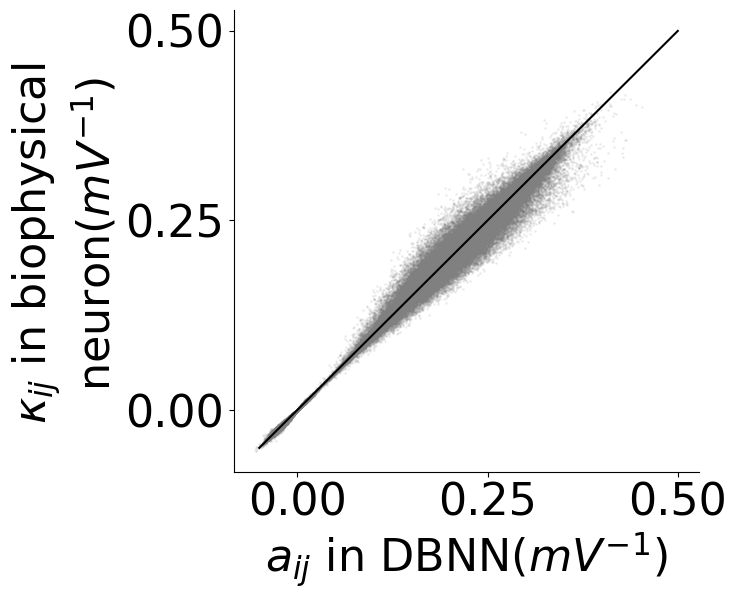

In [125]:
x = np.linspace(-0.05, 0.5, 100)
plt.figure(figsize=(6, 6))
plt.scatter(a, kappa, color='grey', alpha=0.1, s=1)
plt.plot(x, x, color='black')
plt.xlabel('$a_{ij}$ in DBNN($mV^{-1}$)')
plt.ylabel('$\kappa_{ij}$ in biophysical \n neuron($mV^{-1}$)')
plt.yticks([0, 0.25, 0.5])
# Get the current axes
ax = plt.gca()
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/kappa_scatter_plot_new.png', bbox_inches='tight', dpi=800)

In [126]:
np.mean(kappa[:125000])

0.14768611990970915

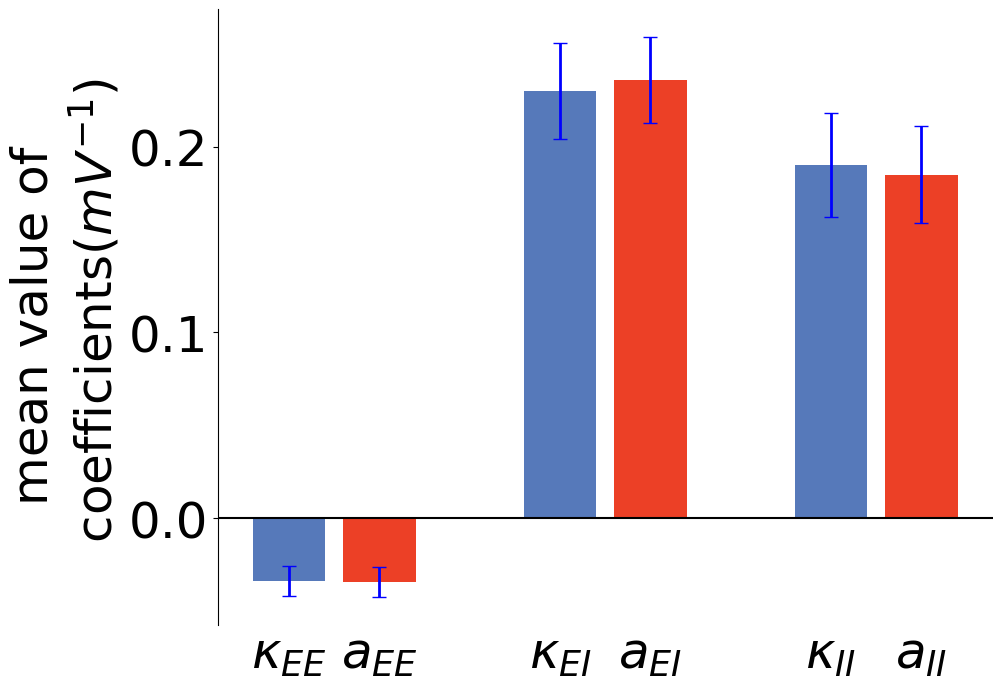

In [143]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 36})
plt.figure(figsize=(10, 8))
x1 = [1, 2]
y1 = [-0.034, -0.0345]
y1err = [[0.0081, 0.008], [0.0081, 0.008]]

x2 = [4, 5]
y2 = [0.23, 0.236]
y2err = [[0.026, 0.023], [0.026, 0.023]]

x3 = [7, 8]
y3 = [0.19, 0.185]
y3err = [[0.028, 0.026], [0.028, 0.026]]

error_params = dict(elinewidth=2, ecolor='blue', capsize=5)  # 设置误差标记参数

plt.bar(x1, y1, log=False, color=['#5679BA', '#EC4026'], yerr=y1err, error_kw=error_params, width=0.8)
plt.bar(x2, y2, log=False, color=['#5679BA', '#EC4026'], yerr=y2err, error_kw=error_params, width=0.8)
plt.bar(x3, y3, log=False, color=['#5679BA', '#EC4026'], yerr=y3err, error_kw=error_params, width=0.8)
plt.ylabel('mean value of \n coefficients($mV^{-1}$)')
plt.xticks([x1[0], x1[1], x2[0], x2[1], x3[0], x3[1]], ['$\kappa_{EE}$', '$a_{EE}$', '$\kappa_{EI}$', '$a_{EI}$', '$\kappa_{II}$', '$a_{II}$'])
plt.axhline(y=0, c='black')
# Get the current axes
ax = plt.gca()
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 设置不显示x轴的小刻度线
ax.tick_params(axis='x', which='both', length=0)  # length=0将刻度线长度设置为0

plt.savefig('figure/kappa_bar_plot2_new.png', bbox_inches='tight', dpi=800)
plt.show()


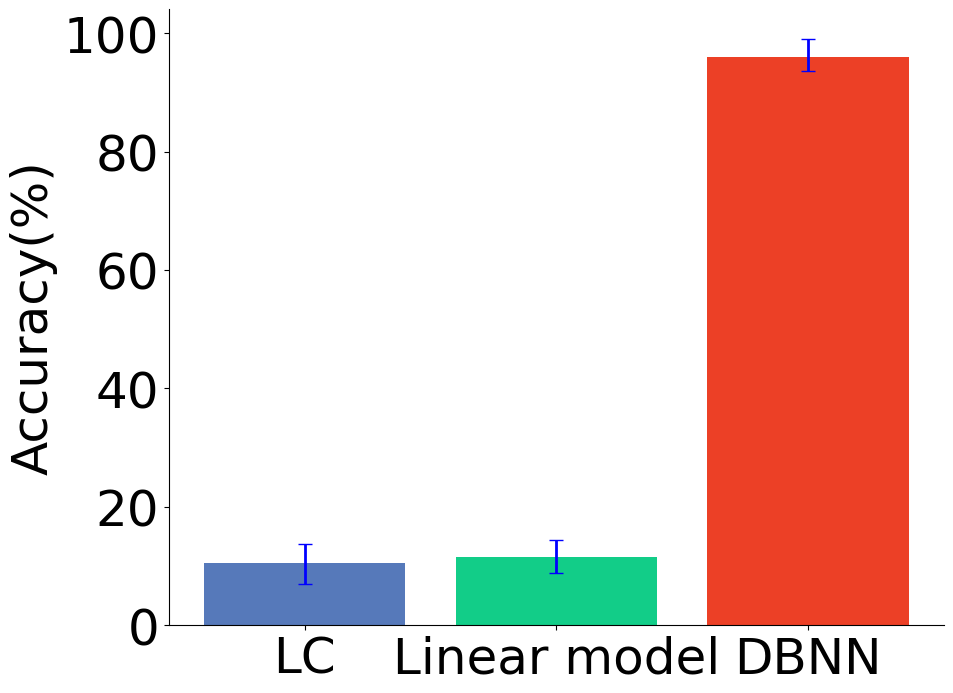

In [152]:
plt.figure(figsize=(10, 8))
accuracy = [0.105 * 100, 0.115* 100, 0.96*100] 
y_err=[[0.035 * 100,0.027 * 100,0.024 * 100],[0.032 * 100, 0.029 * 100, 0.031 * 100]]
error_params=dict(elinewidth=2,ecolor='blue',capsize=5)#设置误差标记参数
plt.bar(range(len(accuracy)), accuracy, color=['#5679BA','#12cd88', '#EC4026'], yerr=y_err, error_kw=error_params,
                    tick_label=['LC','Linear model','DBNN'])
plt.ylabel('Accuracy(%)')
# Get the current axes
ax = plt.gca()
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.title('Accurary')
plt.savefig('figure/accuracy_5D.png', dpi=800, bbox_inches='tight')

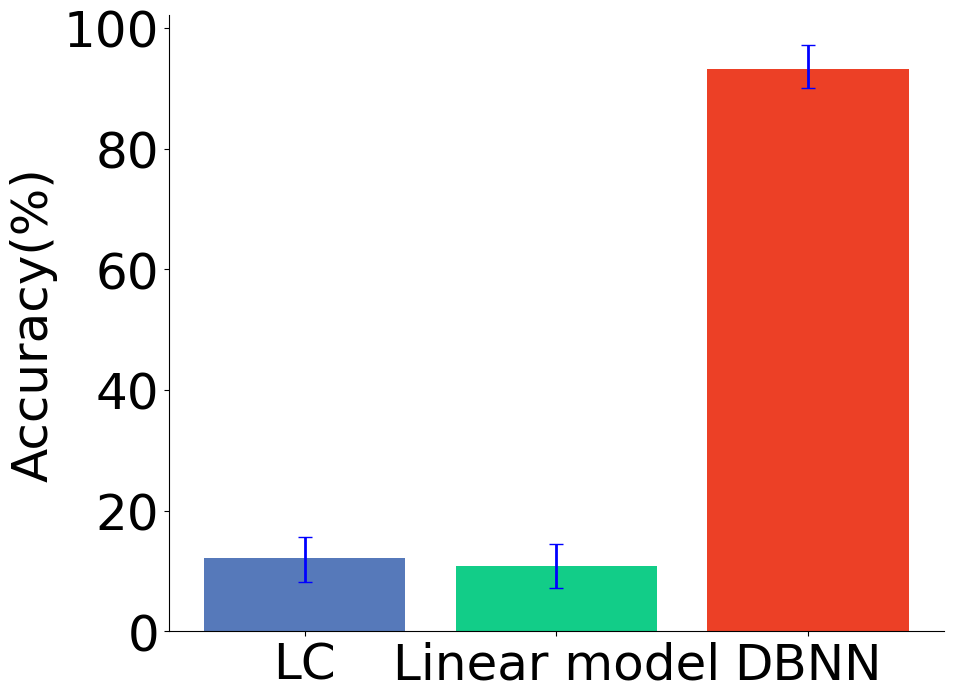

In [153]:
plt.figure(figsize=(10, 8))
accuracy = [0.122 * 100 , 0.109 * 100, 0.932 * 100] 
y_err=[[0.041 * 100,0.037 * 100,0.031 * 100],[0.035 * 100, 0.036 * 100, 0.0407 * 100]]
error_params=dict(elinewidth=2,ecolor='blue',capsize=5)#设置误差标记参数
plt.bar(range(len(accuracy)), accuracy, color=['#5679BA','#12cd88', '#EC4026'], yerr=y_err, error_kw=error_params,
                    tick_label=['LC','Linear model','DBNN'])
# plt.title('Accurary')
plt.ylabel('Accuracy(%)')
# Get the current axes
ax = plt.gca()
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/accuracy_100D.png', dpi=800, bbox_inches='tight')

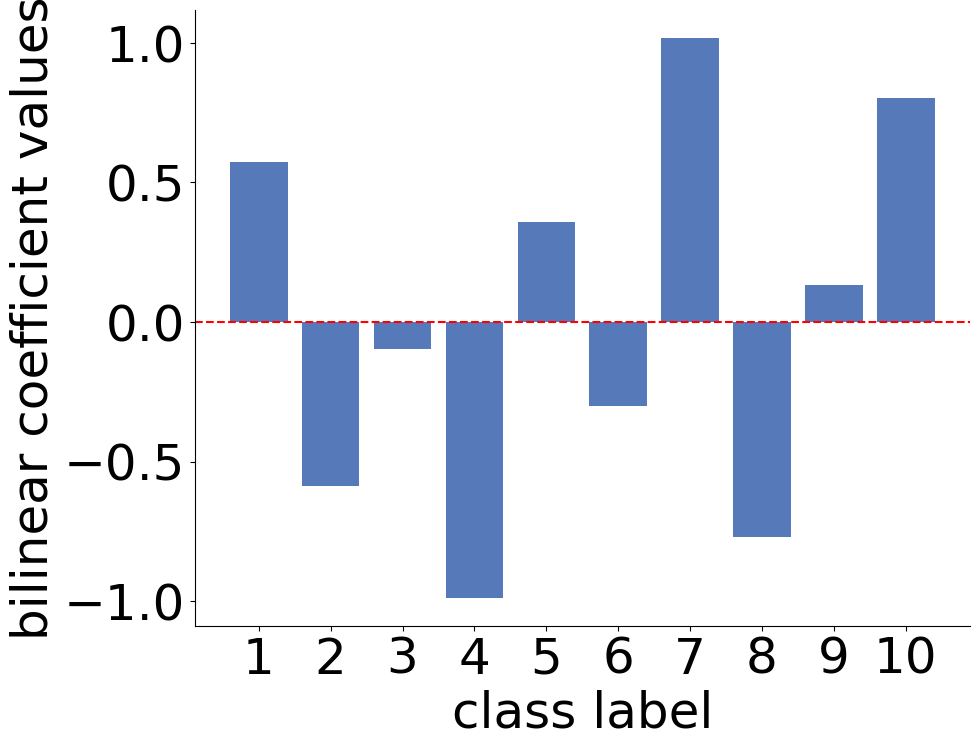

In [160]:
x = np.linspace(0, 2, 10)+ 0.02 * np.random.randn(10) - 1
x_new = np.random.permutation(x)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 11), x_new, color='#5679BA')
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(range(1, 11))
plt.ylabel('bilinear coefficient values')
plt.xlabel('class label')
# plt.yticks([])
# plt.ylim(0.3, 0.4)
# plt.title('Mean MP for the Trainset for DBNN')
# Get the current axes
ax = plt.gca()
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/kappa_dis_10D.png', dpi=800, bbox_inches='tight')

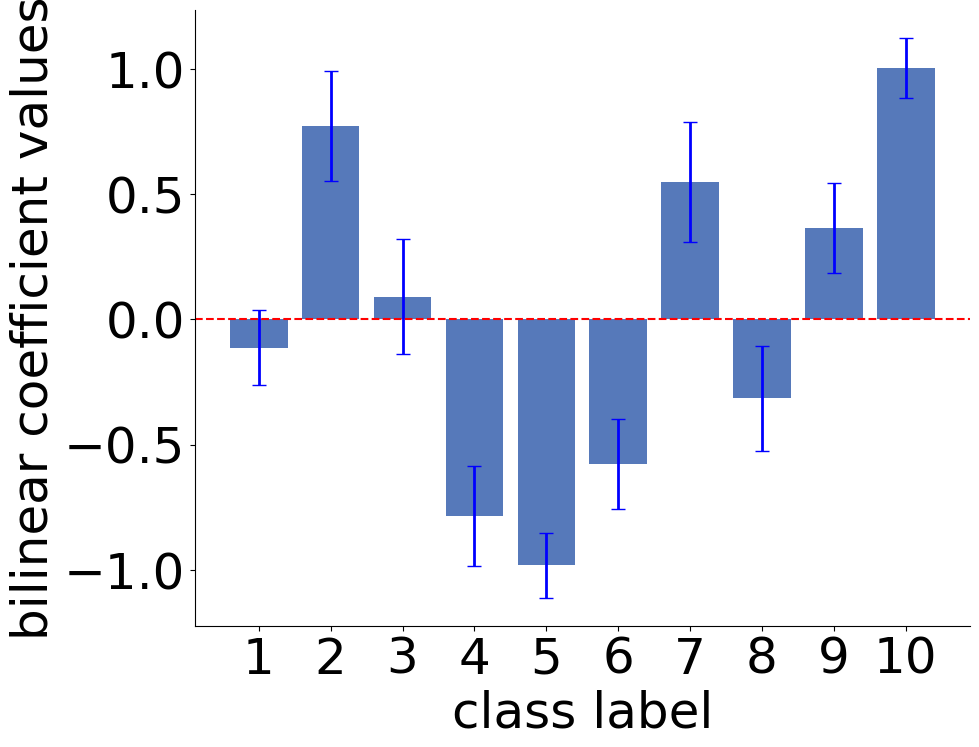

In [163]:
x = np.linspace(0, 2, 10)+ 0.02 * np.random.randn(10) - 1
x_new = np.random.permutation(x)
plt.figure(figsize=(10, 8))
y_err=[[0.15,0.22,0.23, 0.2, 0.13, 0.18, 0.24, 0.21, 0.18, 0.12],[0.15,0.22,0.23, 0.2, 0.13, 0.18, 0.24, 0.21, 0.18, 0.12]]
error_params=dict(elinewidth=2,ecolor='blue',capsize=5)#设置误差标记参数
plt.bar(range(1, 11), x_new, color='#5679BA', yerr=y_err, error_kw=error_params)
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(range(1, 11))
plt.ylabel('bilinear coefficient values')
plt.xlabel('class label')
# plt.yticks([])
# plt.ylim(0.3, 0.4)
# plt.title('Mean MP for the Trainset for DBNN')
# Get the current axes
ax = plt.gca()
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/kappa_dis_100D.png', dpi=800, bbox_inches='tight')

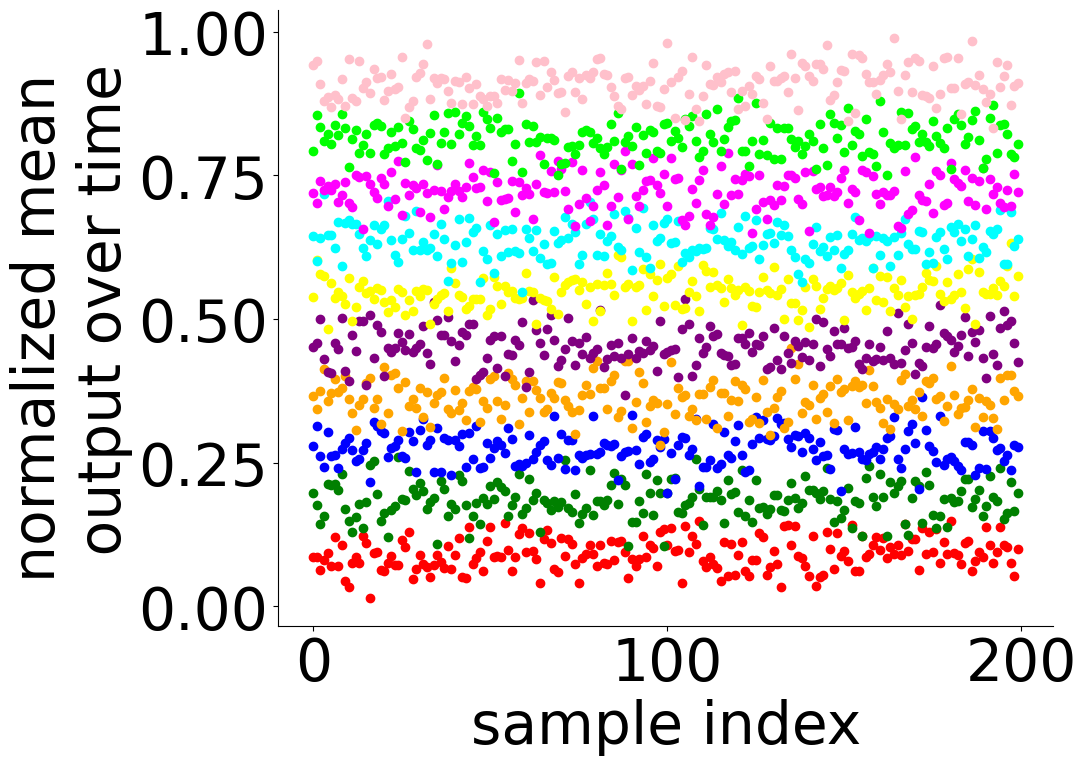

In [49]:
plt.figure(figsize=(10, 8))
x = np.zeros((10, 200))
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) * 3
for i in range(10):
    x[i] = np.random.randn(200) + a[i]

x  = x / 33
# 定义颜色映射
# 定义颜色列表
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink']
y = np.arange(len(x[0]))
for i in range(len(x)):
    plt.scatter(y, x[i], color=colors[i])

# plt.yticks([])
plt.xlabel('sample index')
plt.ylabel('normalized mean \n output over time')
# Get the current axes
ax = plt.gca()
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.title('Mean MP for the Trainset for Linear model')
plt.savefig('figure/mean_mp_100D_new.png', bbox_inches='tight', dpi=800)

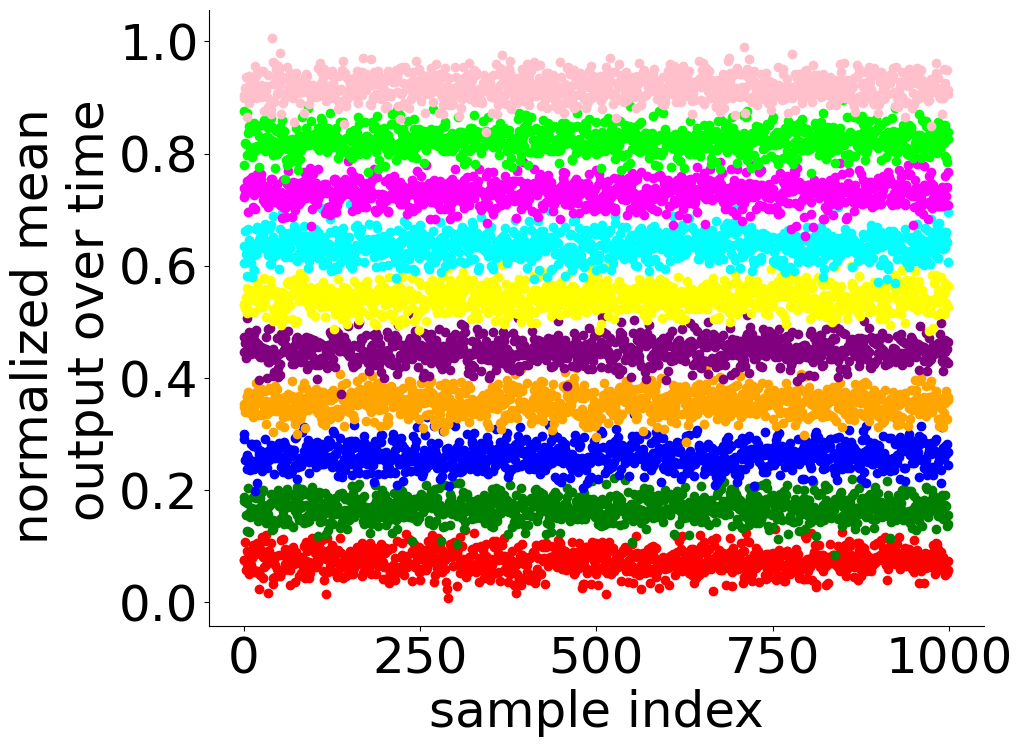

In [185]:
plt.figure(figsize=(10, 8))
x = np.zeros((10, 1000))
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) * 4.5
for i in range(10):
    x[i] = np.random.randn(1000) + a[i]

x  = x / 48 - 0.02
# 定义颜色映射
# 定义颜色列表
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink']
y = np.arange(len(x[0]))
for i in range(len(x)):
    plt.scatter(y, x[i], color=colors[i])

# plt.yticks([])
plt.xlabel('sample index')
plt.ylabel('normalized mean \n output over time')
# Get the current axes
ax = plt.gca()
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.title('Mean MP for the Trainset for Linear model')
plt.savefig('figure/mean_mp_5D.png', bbox_inches='tight', dpi=800)

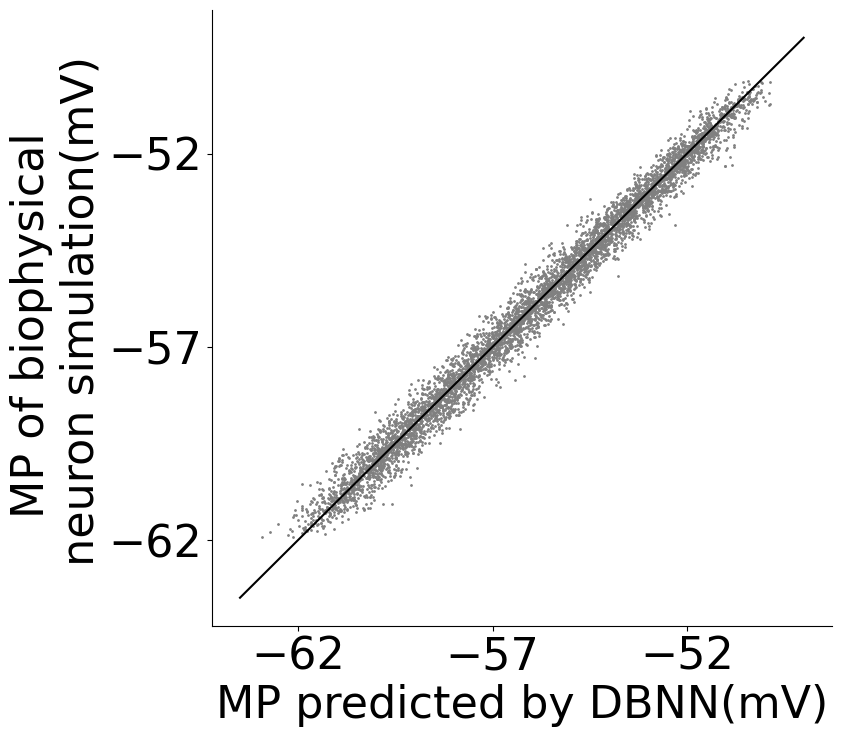

In [20]:
plt.rcParams.update({'font.size': 32})
a = np.linspace(-63, -52, 100)
b = a
x = np.linspace(-63.5, -49, 100)
plt.figure(figsize=(8, 8))

plt.xlabel('MP predicted by DBNN(mV)')
plt.ylabel('MP of biophysical \n neuron simulation(mV)')
kappa = np.random.rand(6000) * 10 + -60 + np.random.rand(6000) * -2
np.random.shuffle(kappa)
a = np.zeros_like(kappa)
a[:int(len(kappa)*0.11)] = kappa[:int(len(kappa)*0.11)] + kappa[:int(len(kappa)*0.11)] * np.random.randn(int(len(kappa)*0.11)) * 0.001 
a[int(len(kappa)*0.11):int(len(kappa)*0.22)] = kappa[int(len(kappa)*0.11):int(len(kappa)*0.22)] + kappa[int(len(kappa)*0.11):int(len(kappa)*0.22)] * np.random.randn(int(len(kappa)*0.11)) * 0.003 
a[int(len(kappa)*0.22):int(len(kappa)*0.55)] = kappa[int(len(kappa)*0.22):int(len(kappa)*0.55)] + kappa[int(len(kappa)*0.22):int(len(kappa)*0.55)] * np.random.randn(int(len(kappa)*0.33)) * 0.006
a[int(len(kappa)*0.55):] = kappa[int(len(kappa)*0.55):] + kappa[int(len(kappa)*0.55):] * np.random.randn(int(len(kappa)*0.45)) * 0.008 
# Set the x and y axis ticks
plt.xticks([-62, -57, -52])
plt.yticks([-62, -57, -52])
plt.scatter(a, kappa, color='grey', s=1)
plt.plot(x, x, color='black')
# Get the current axes
ax = plt.gca()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/MP_scatter_plot_L5.pdf', bbox_inches='tight')

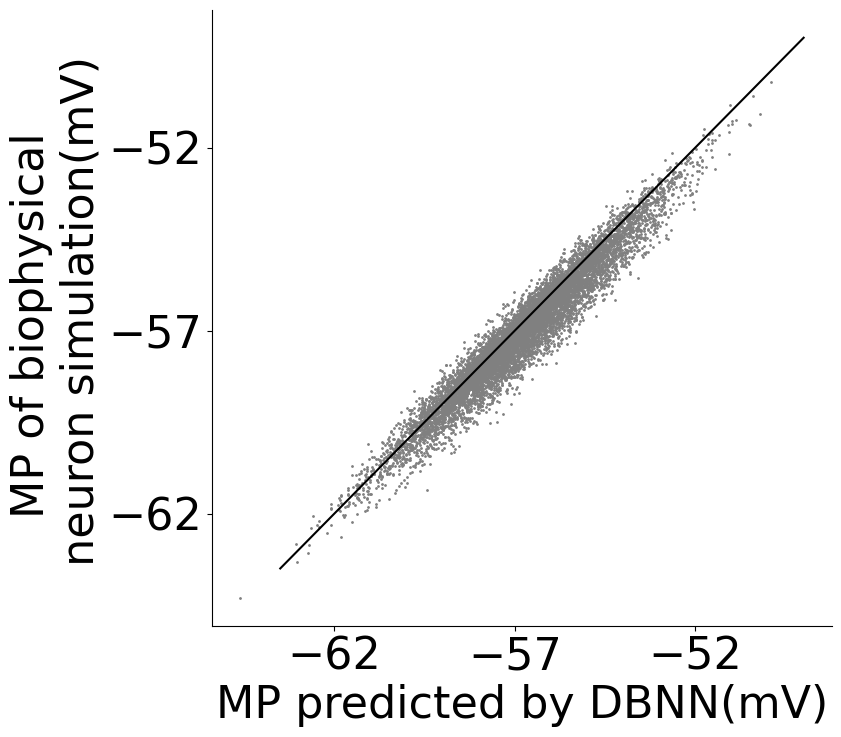

In [21]:
plt.rcParams.update({'font.size': 32})
a = np.linspace(-63, -52, 100)
b = a
x = np.linspace(-63.5, -49, 100)
plt.figure(figsize=(8, 8))

plt.xlabel('MP predicted by DBNN(mV)')
plt.ylabel('MP of biophysical \n neuron simulation(mV)')
kappa = np.random.randn(10000) * 1.7 + -57
np.random.shuffle(kappa)
a = np.zeros_like(kappa)
a[:int(len(kappa)*0.11)] = kappa[:int(len(kappa)*0.11)] + kappa[:int(len(kappa)*0.11)] * np.random.randn(int(len(kappa)*0.11)) * 0.001 + 0.3
a[int(len(kappa)*0.11):int(len(kappa)*0.22)] = kappa[int(len(kappa)*0.11):int(len(kappa)*0.22)] + kappa[int(len(kappa)*0.11):int(len(kappa)*0.22)] * np.random.randn(int(len(kappa)*0.11)) * 0.003 
a[int(len(kappa)*0.22):int(len(kappa)*0.55)] = kappa[int(len(kappa)*0.22):int(len(kappa)*0.55)] + kappa[int(len(kappa)*0.22):int(len(kappa)*0.55)] * np.random.randn(int(len(kappa)*0.33)) * 0.006
a[int(len(kappa)*0.55):] = kappa[int(len(kappa)*0.55):] + kappa[int(len(kappa)*0.55):] * np.random.randn(int(len(kappa)*0.45)) * 0.008 + 0.5
# Set the x and y axis ticks
plt.xticks([-62, -57, -52])
plt.yticks([-62, -57, -52])
plt.scatter(a, kappa, color='grey', s=1)
plt.plot(x, x, color='black')
# Get the current axes
ax = plt.gca()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/MP_scatter_plot_ganglion.pdf', bbox_inches='tight')

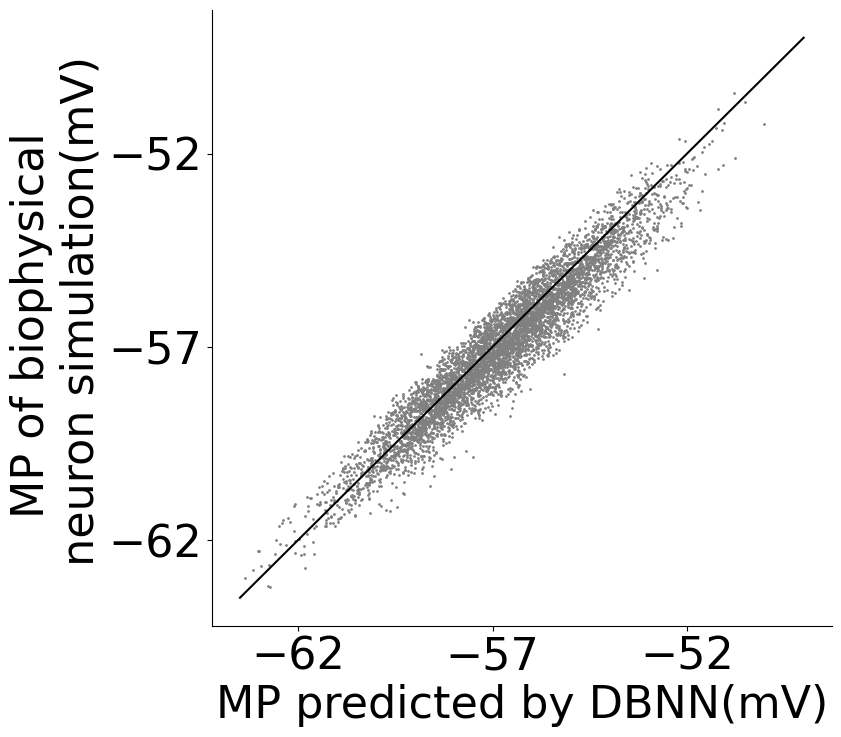

In [22]:
plt.rcParams.update({'font.size': 32})
a = np.linspace(-63, -52, 100)
b = a
x = np.linspace(-63.5, -49, 100)
plt.figure(figsize=(8, 8))

plt.xlabel('MP predicted by DBNN(mV)')
plt.ylabel('MP of biophysical \n neuron simulation(mV)')
kappa = np.random.randn(6000) * 1.8 + -57
np.random.shuffle(kappa)
a = np.zeros_like(kappa)
a[:int(len(kappa)*0.11)] = kappa[:int(len(kappa)*0.11)] + kappa[:int(len(kappa)*0.11)] * np.random.randn(int(len(kappa)*0.11)) * 0.001 + 0.3
a[int(len(kappa)*0.11):int(len(kappa)*0.22)] = kappa[int(len(kappa)*0.11):int(len(kappa)*0.22)] + kappa[int(len(kappa)*0.11):int(len(kappa)*0.22)] * np.random.randn(int(len(kappa)*0.11)) * 0.004 - 0.6
a[int(len(kappa)*0.22):int(len(kappa)*0.55)] = kappa[int(len(kappa)*0.22):int(len(kappa)*0.55)] + kappa[int(len(kappa)*0.22):int(len(kappa)*0.55)] * np.random.randn(int(len(kappa)*0.33)) * 0.007
a[int(len(kappa)*0.55):] = kappa[int(len(kappa)*0.55):] + kappa[int(len(kappa)*0.55):] * np.random.randn(int(len(kappa)*0.45)) * 0.01 + 0.5
# Set the x and y axis ticks
plt.xticks([-62, -57, -52])
plt.yticks([-62, -57, -52])
plt.scatter(a, kappa, color='grey', s=1)
plt.plot(x, x, color='black')
# Get the current axes
ax = plt.gca()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/MP_scatter_plot_L23.pdf', bbox_inches='tight')

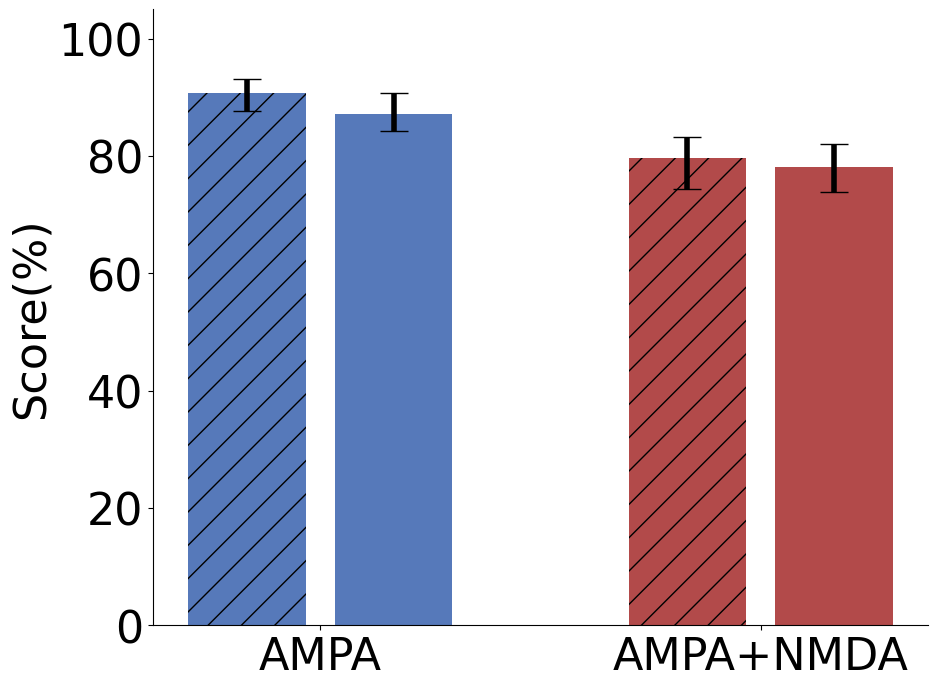

In [18]:
plt.rcParams.update({'font.size': 32})
x1 = [1, 2]
y1 = [90.7, 87.1]
y1err = [[3.1, 2.8], [2.4, 3.6]]

x2 = [4, 5]
y2 = [79.6, 78.1]
y2err = [[5.3, 4.2], [3.7, 4]]

plt.figure(figsize=(10,8))
plt.ylim(0, 105)
error_params=dict(elinewidth=4,ecolor='black',capsize=10)#设置误差标记参数
plt.bar(x1,y1,color=['#5679BA','#5679BA'],yerr=y1err, error_kw=error_params, width=0.8, hatch=['/', ''])
plt.bar(x2,y2,color=['#B24A4A','#B24A4A'],yerr=y2err, error_kw=error_params, width=0.8, hatch=['/', ''])
plt.ylabel('Score(%)')
plt.xticks([1.5, 4.5], ['AMPA', 'AMPA+NMDA'], rotation=0)

# Get the current axes
ax = plt.gca()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/pre_rec_bar_plot_new_ganglion.pdf', bbox_inches='tight')

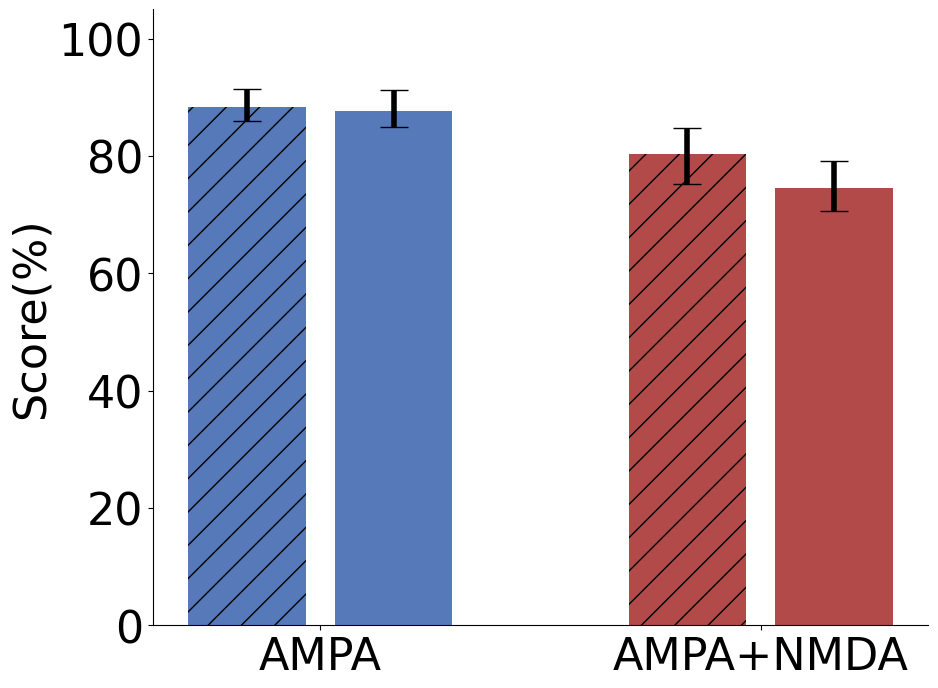

In [19]:
plt.rcParams.update({'font.size': 32})
x1 = [1, 2]
y1 = [88.3, 87.6]
y1err = [[2.4, 2.7], [3.1, 3.6]]

x2 = [4, 5]
y2 = [80.4, 74.5]
y2err = [[5.2, 3.9], [4.3, 4.7]]

plt.figure(figsize=(10,8))
plt.ylim(0, 105)
error_params=dict(elinewidth=4,ecolor='black',capsize=10)#设置误差标记参数
plt.bar(x1,y1,color=['#5679BA','#5679BA'],yerr=y1err, error_kw=error_params, width=0.8, hatch=['/', ''])
plt.bar(x2,y2,color=['#B24A4A','#B24A4A'],yerr=y2err, error_kw=error_params, width=0.8, hatch=['/', ''])
plt.ylabel('Score(%)')
plt.xticks([1.5, 4.5], ['AMPA', 'AMPA+NMDA'], rotation=0)

# Get the current axes
ax = plt.gca()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/pre_rec_bar_plot_new_L23.pdf', bbox_inches='tight')

In [ ]:
rate = [5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 20, 25, 30]
bilinear = [0.11, 0.23, 0.27, 0.34, 0.51, 0.63, 0.78, 0.90, 0.93, 0.95, 0.97, 0.98, 0.991, 0.992]
linear = [0.12, 0.14, 0.2, 0.23, 0.28, 0.43, 0.49, 0.56, 0.72, 0.77, 0.92, 0.95, 0.982, 0.985]
yerr_bilinear = [0.09, 0.088, 0.085, 0.074, 0.07, 0.069, 0.073, 0.063, 0.054, 0.03, 0.02, 0.015, 0.01, 0.01]  # replace with your actual errors
yerr_linear = [0.11, 0.085, 0.08, 0.075, 0.072, 0.063, 0.06, 0.054, 0.051, 0.04, 0.04, 0.021, 0.01, 0.01]  # replace with your actual errors

plt.errorbar(rate, bilinear, yerr=yerr_bilinear, fmt='o', color='b', ecolor='b', capsize=3, label='DBNN')
plt.errorbar(rate, linear, yerr=yerr_linear, fmt='o', color='r', ecolor='r', capsize=3, label='Linear model')
plt.plot(rate, bilinear, color='b')
plt.plot(rate, linear, color='r')
plt.axhline(y=1, color='k', linestyle='--')
# plt.title('size = 100')
plt.ylabel('Accuracy')
plt.xlabel('Input rate (Hz)')
plt.legend()
plt.savefig('figure/accuracy_input_rate_error_bar.png', dpi=800, bbox_inches='tight')

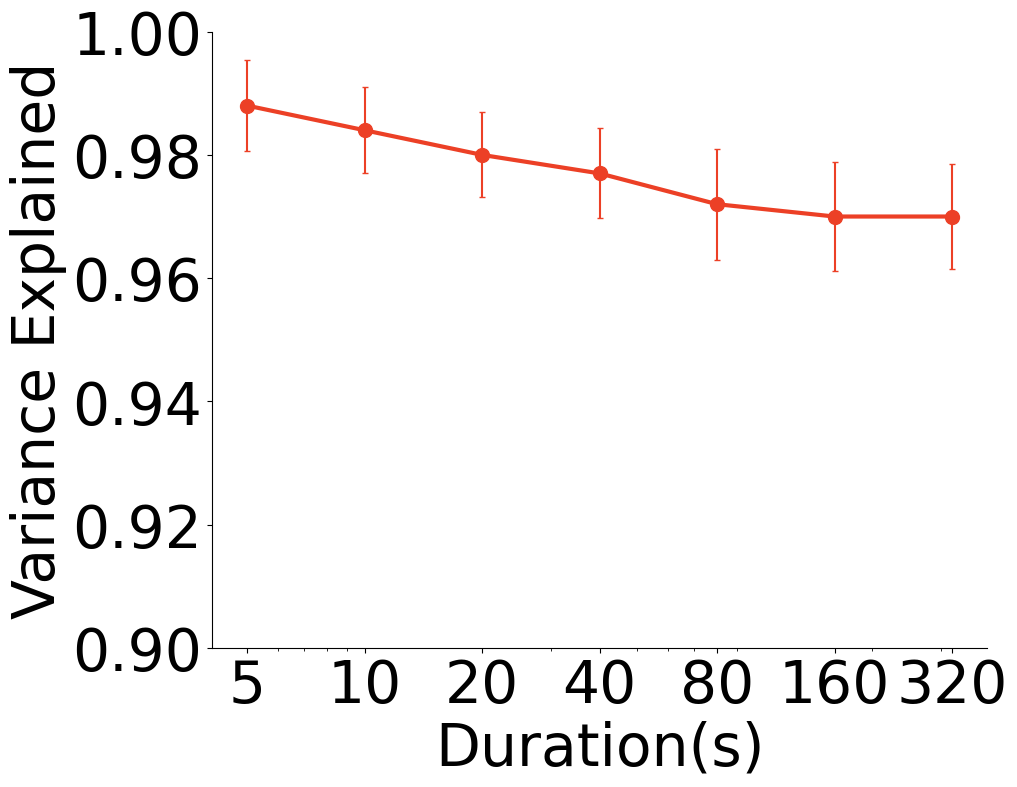

In [46]:
plt.rcParams.update({'font.size': 42})
plt.figure(figsize=(10,8))
ve = [0.988, 0.984, 0.98, 0.977, 0.972, 0.97, 0.97]
yerr_bilinear = [0.0074, 0.007, 0.0069, 0.0073, 0.009, 0.0088, 0.0085]  
dur_list = [5, 10, 20, 40, 80, 160, 320]
# plt.scatter(dur_list, ve)
plt.errorbar(dur_list, ve, yerr=yerr_bilinear, fmt='o', color='#EC4026', markersize=10, ecolor='#EC4026', capsize=2, label='DBNN')
plt.plot(dur_list, ve, color='#EC4026', lw=3)
# set the x ticks as dur_list
xlabel_ticks = ['5', '10', '20', '40', '80', '160', '320']
plt.xscale('log')
plt.xticks(dur_list, xlabel_ticks)
plt.ylim(0.9, 1)
plt.ylabel('Variance Explained')
plt.xlabel('Duration(s)')
# Get the current axes
ax = plt.gca()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/DBNN_different_duration_passive_new.png', dpi=800, bbox_inches='tight')

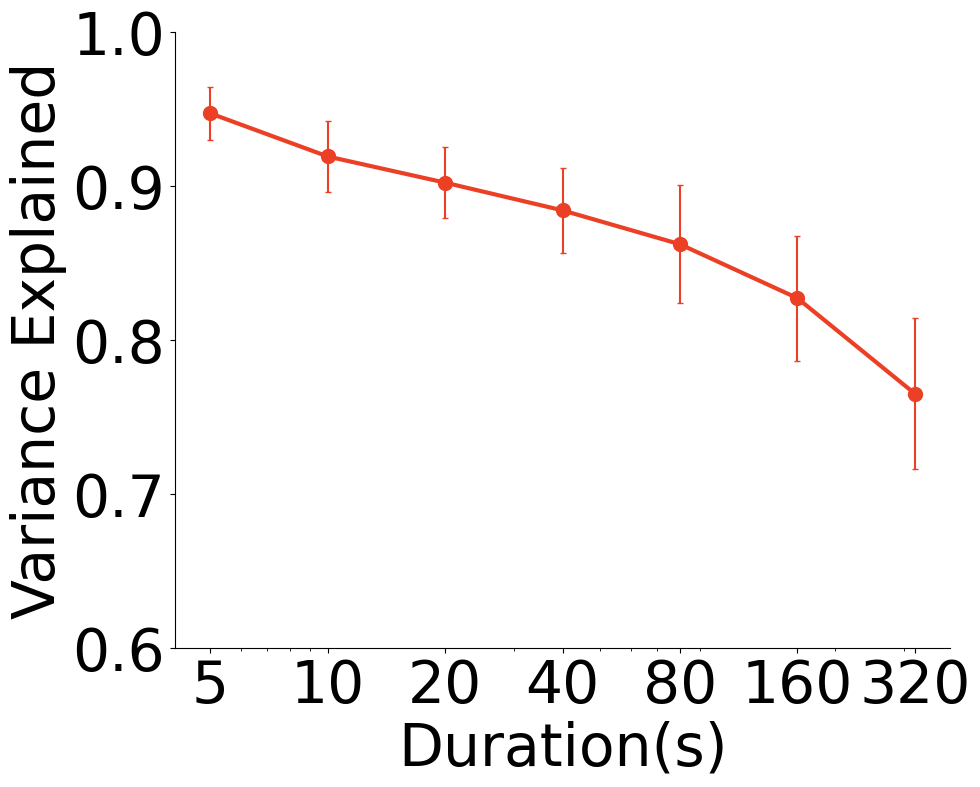

In [47]:
plt.rcParams.update({'font.size': 42})
plt.figure(figsize=(10,8))
ve = [0.947, 0.919, 0.902, 0.884, 0.862, 0.827, 0.765]
yerr_bilinear = [0.0174, 0.023, 0.023, 0.0276, 0.0384, 0.0405, 0.0492]  
dur_list = [5, 10, 20, 40, 80, 160, 320]
# plt.scatter(dur_list, ve)
plt.errorbar(dur_list, ve, yerr=yerr_bilinear, fmt='o', color='#EC4026', markersize=10, ecolor='#EC4026', capsize=2, label='DBNN')
plt.plot(dur_list, ve, color='#EC4026', lw=3)
# set the x ticks as dur_list
xlabel_ticks = ['5', '10', '20', '40', '80', '160', '320']
plt.xscale('log')
plt.xticks(dur_list, xlabel_ticks)
plt.ylim(0.6, 1)
plt.ylabel('Variance Explained')
plt.xlabel('Duration(s)')
# Get the current axes
ax = plt.gca()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure/DBNN_different_duration_active_new.png', dpi=800, bbox_inches='tight')